## **Classification Model for CIFAR 100**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the **CIFAR 100** dataset

In [0]:
from tensorflow.keras.datasets import cifar100

Splitting the dataset into Train and Test sets

In [0]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

Some random images from the CIFAR 100 dataset.

Shape of every image is ( 32 x 32 x 3 ) 

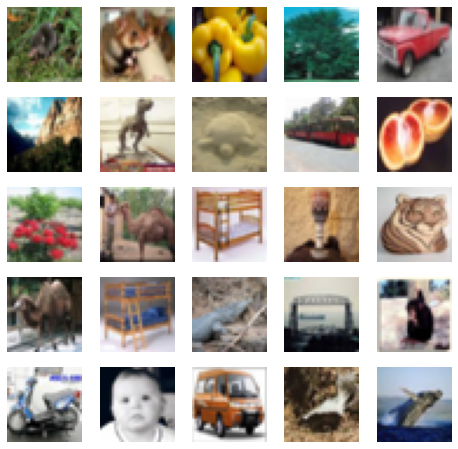

In [24]:
fig, axes1 = plt.subplots(5,5,figsize=(8,8))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(x_train)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(x_train[i:i+1][0])

In [5]:
print('Maximum Value: ',x_train.max())
print('Shape of image: ',x_train.shape[1:])

Maximum Value:  255
Shape of image:  (32, 32, 3)


Preprcessing the training and test sets inorder to have values of the array of images between 0 and 1.

In [0]:
x_train = x_train/255
x_test = x_test/255

In [7]:
print('Maximum Value: ',x_train.max())

Maximum Value:  1.0


In [8]:
print('Shape of label: ',y_train.shape[1:])


Shape of label:  (1,)


One Hot Encoding the labels of the image since classification is a categorical task.

The cell transforms single column of the label y into 100 columns since there are total 100 different classes in the dataset.

In [0]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [10]:
print('Shape of label: ',y_train.shape[1:])

Shape of label:  (100,)


Defining the input shape.

The images already of the shape (32 x 32 x 3) but it is good practice to define is separately. It is helpful during model creation and training.

In [0]:
input_shape = (32,32,3)

Important imports for creating the model.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,MaxPooling2D,Dense
from tensorflow.keras.layers import Dropout,ELU,LeakyReLU,BatchNormalization

Creating the model.

In [0]:
model = Sequential()
model.add(Conv2D(filters=128, kernel_size=(2,2),activation='relu',input_shape=input_shape))
model.add(Conv2D(filters=128, kernel_size=(2,2),activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(2,2),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(2,2),activation=LeakyReLU(0.1),input_shape=input_shape))
model.add(Conv2D(filters=32, kernel_size=(2,2),activation=LeakyReLU(0.1),input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=125,activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(units=100,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 128)       1664      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 128)       65664     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        32832     
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        8224      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 32)        4

Instance of the Early Stopping

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5)

Fitting the training set to the model and validating the model on the test set. 

In [16]:
model.fit(x=x_train,y=y_cat_train,epochs=50,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 39s 25ms/step - loss: 4.0264 - accuracy: 0.0846 - val_loss: 3.6731 - val_accuracy: 0.1396
Epoch 2/50
1563/1563 [==============================] - 39s 25ms/step - loss: 3.5370 - accuracy: 0.1564 - val_loss: 3.5345 - val_accuracy: 0.1670
Epoch 3/50
1563/1563 [==============================] - 39s 25ms/step - loss: 3.3112 - accuracy: 0.1989 - val_loss: 3.1168 - val_accuracy: 0.2425
Epoch 4/50
1563/1563 [==============================] - 39s 25ms/step - loss: 3.1717 - accuracy: 0.2241 - val_loss: 2.9470 - val_accuracy: 0.2728
Epoch 5/50
1563/1563 [==============================] - 39s 25ms/step - loss: 3.0609 - accuracy: 0.2468 - val_loss: 2.8691 - val_accuracy: 0.2921
Epoch 6/50
1563/1563 [==============================] - 39s 25ms/step - loss: 2.9693 - accuracy: 0.2614 - val_loss: 2.8405 - val_accuracy: 0.2944
Epoch 7/50
1563/1563 [==============================] - 39s 25ms/step - loss: 2.8769 - accuracy: 0.2800 - val_loss: 2.8233 -

The list of losses and accuracies of each epoch during the training.

In [0]:
results = pd.DataFrame(model.history.history)

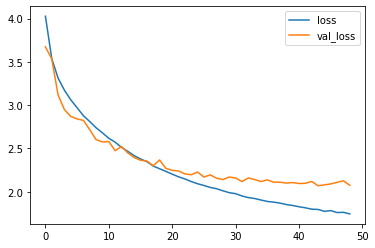

In [18]:
results[['loss','val_loss']].plot()

Looking at the graphs we can say that the model is not overfitting.

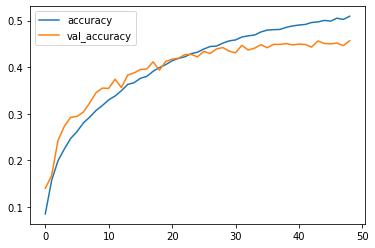

In [19]:
results[['accuracy','val_accuracy']].plot()

Saving the model.

In [0]:
model.save('CIFAR_100_Classifier_model.h5')